In [1]:
import gym
import numpy as np
import torch

from stable_baselines3 import SAC, PPO, HerReplayBuffer
from stable_baselines3.common.buffers import DictReplayBuffer
from stable_baselines3.sac.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecNormalize
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3.common.monitor import Monitor

from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback

import numpy as np
import gym

from Lorenz96_Env_ICs import Lorenz96Env
from stable_baselines3 import PPO
import time 
import matplotlib.pyplot as plt
from typing import Callable

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from stable_baselines3.common.evaluation import evaluate_policy

In [2]:
def make_env(env_id, rank, integ_step, noise, seed=0):
    """
    Utility function for multiprocessed env.

    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environments you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    """
    def _init():
        env = Lorenz96Env(integ_steps = integ_step)
        env.seed(seed + rank)
        return env
    set_random_seed(seed+ rank)
    return _init

In [3]:
num_cpu = 70  # Number of processes to use
# Create the vectorized environment
env = SubprocVecEnv([make_env('Lorenz', rank=i, integ_step=int(4), noise=1.0) for i in range(num_cpu)])
env = VecNormalize(env, norm_obs=True, norm_reward=False)

torch.backends.cudnn.benchmark = True

neurons = [128]
LR = [0.001]
Gamma =[0.05, 0.1, 0.8, 0.9]
BS = [100]
vf_coeff = [0.7, 0.8, 0.9]
max_grad_norm = [0.8, 0.9]


/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

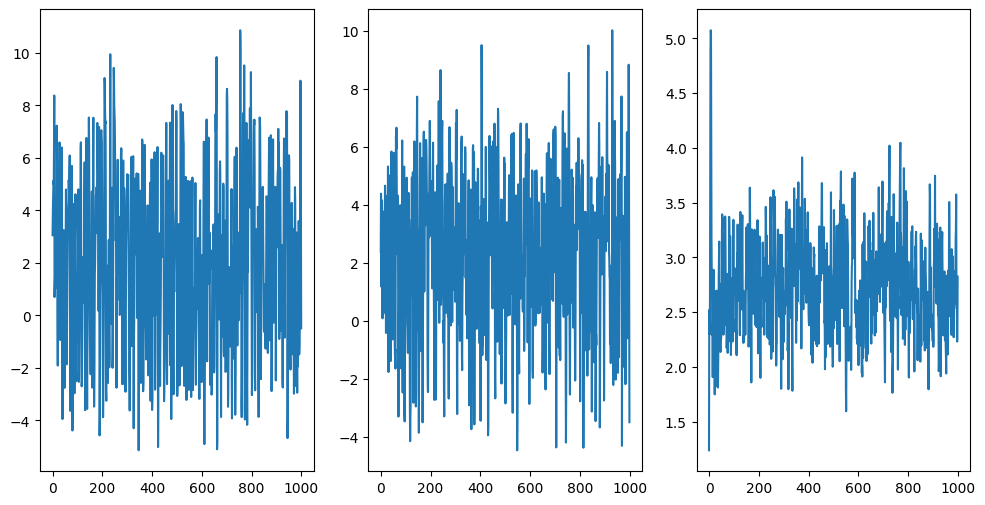

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

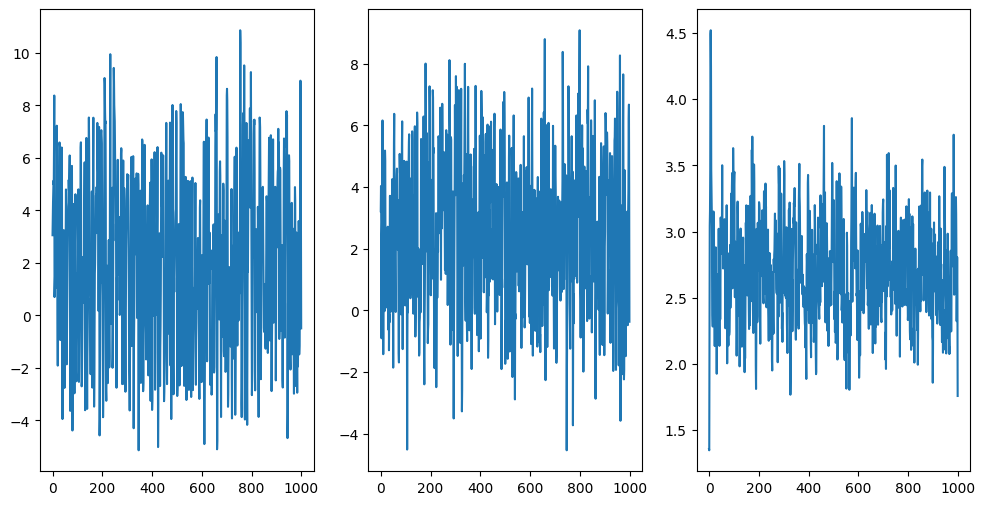

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

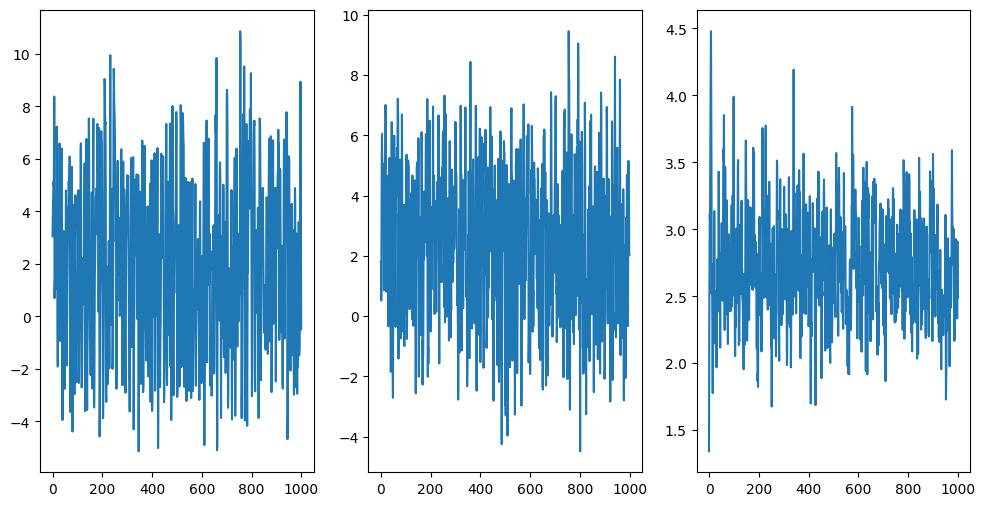

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

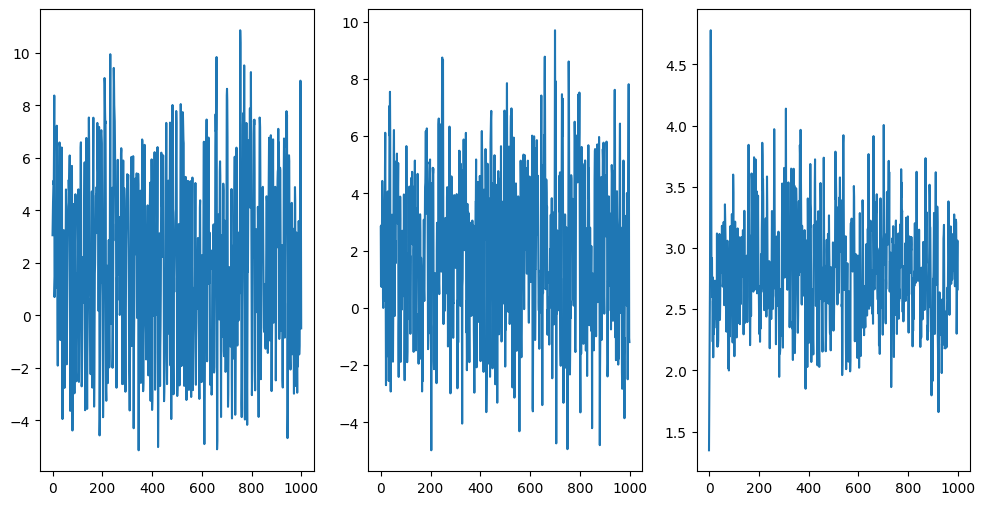

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

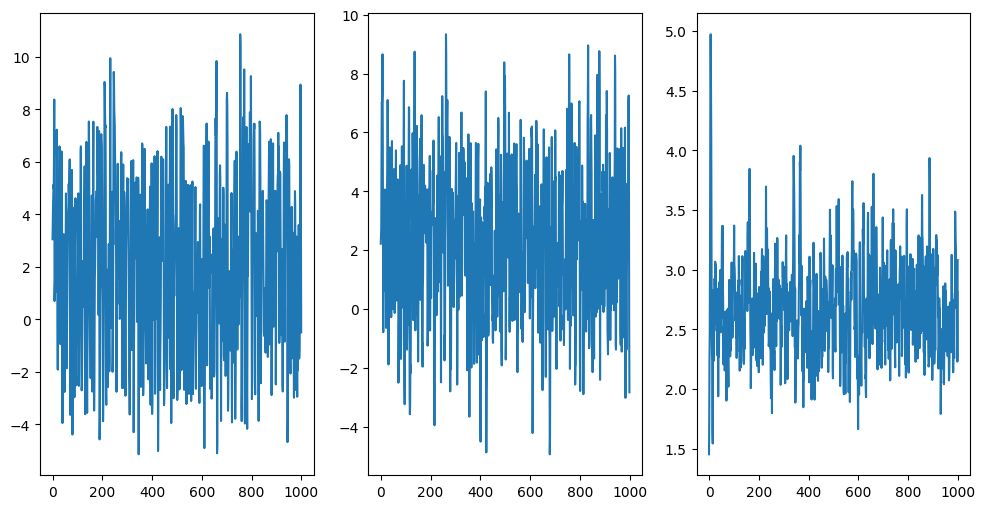

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

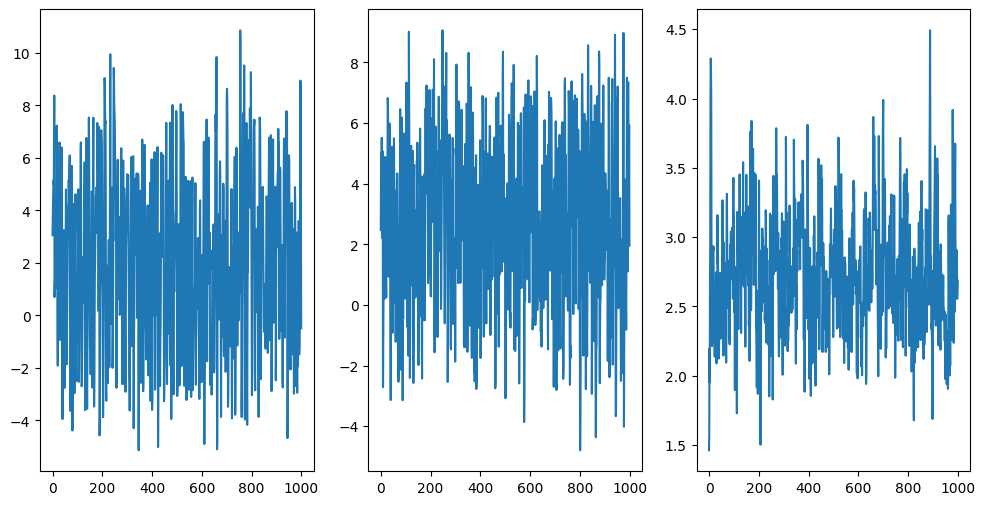

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

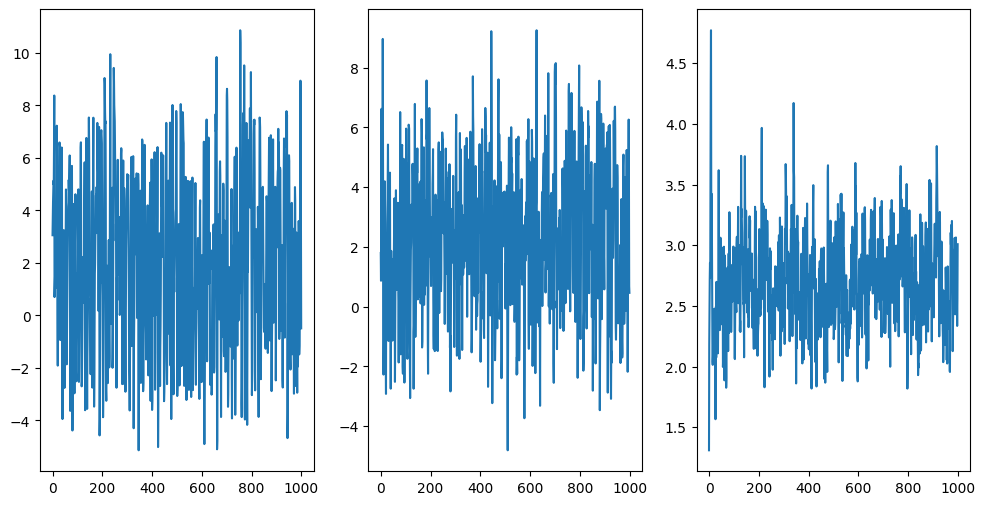

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

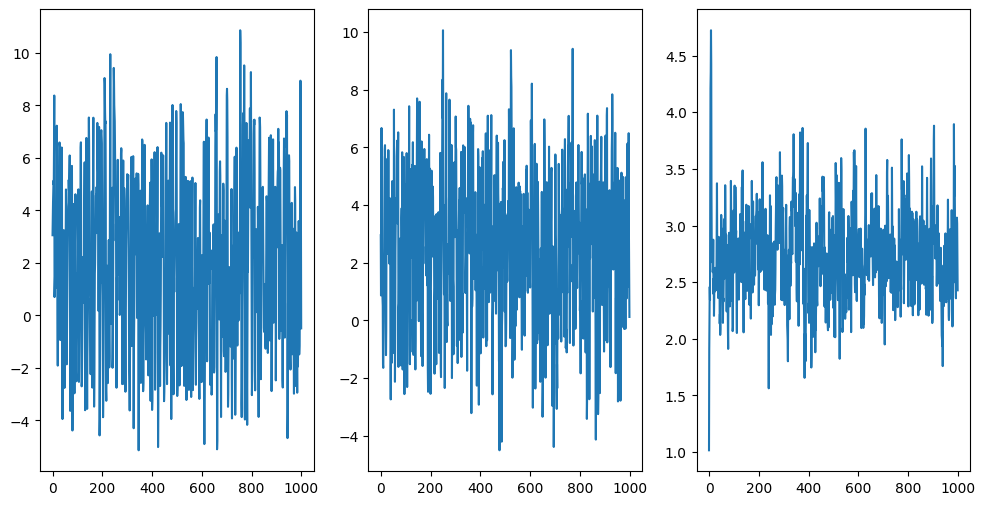

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

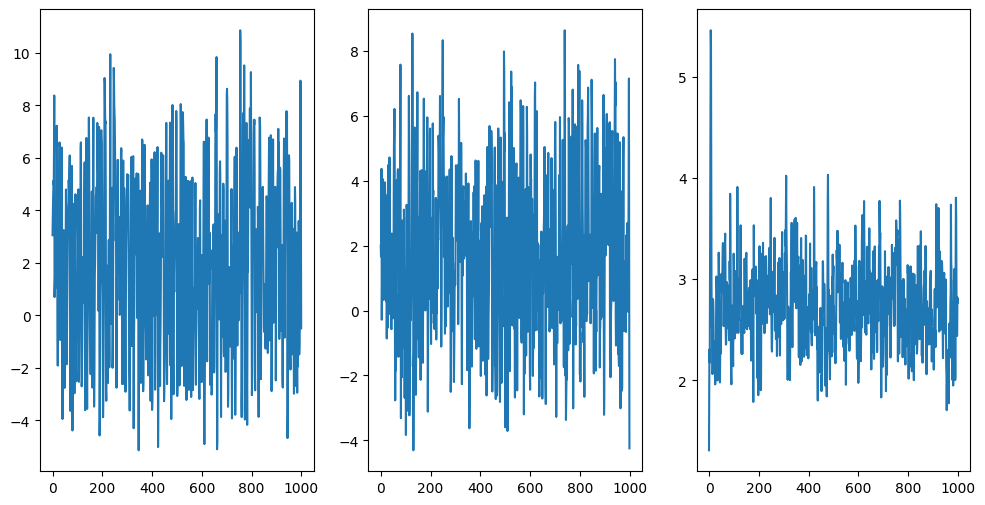

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

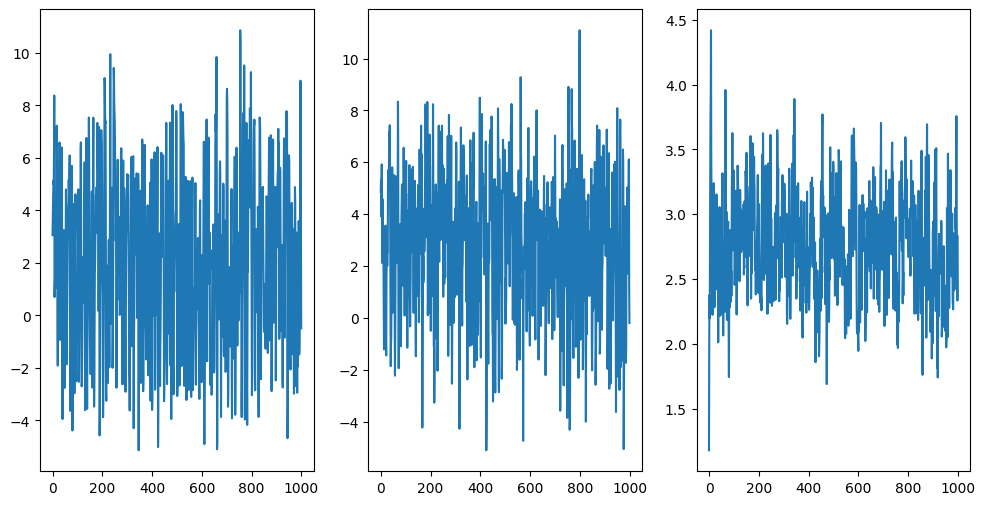

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

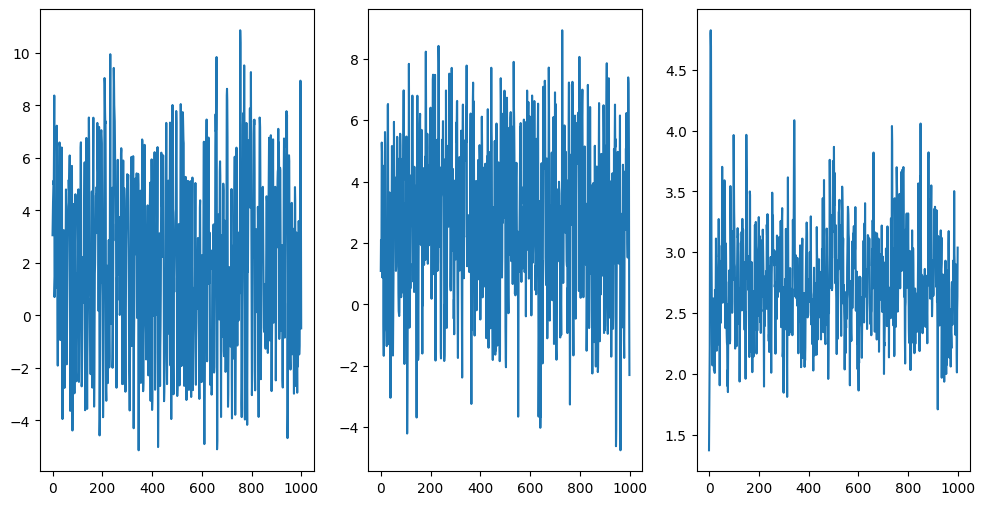

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

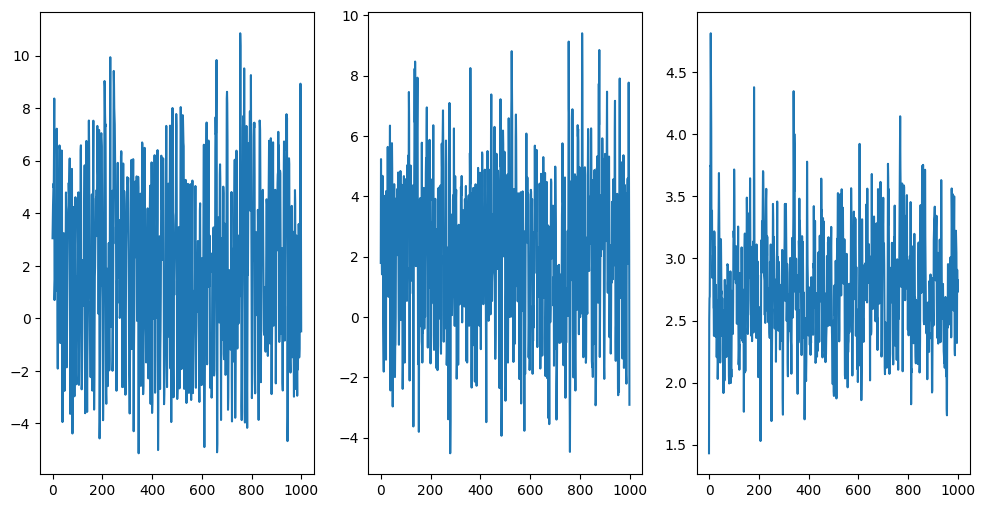

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

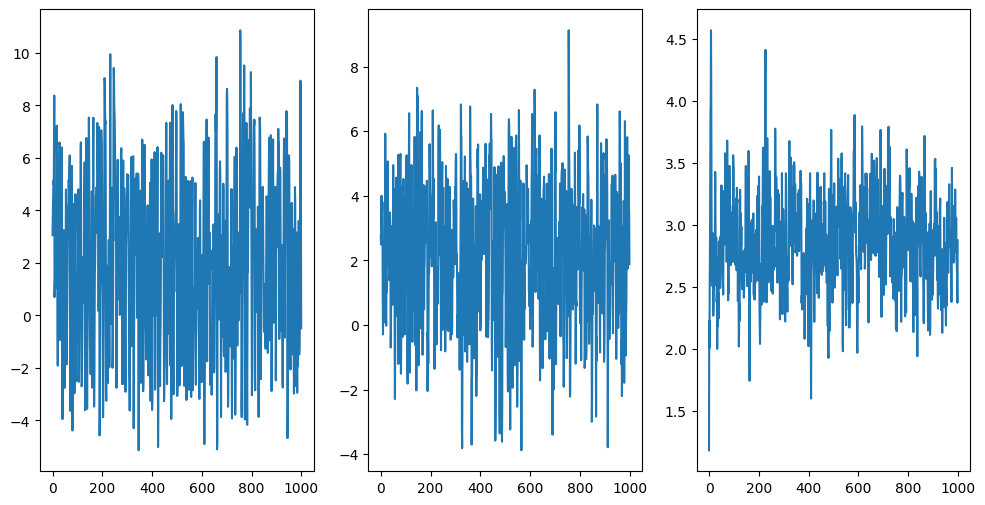

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

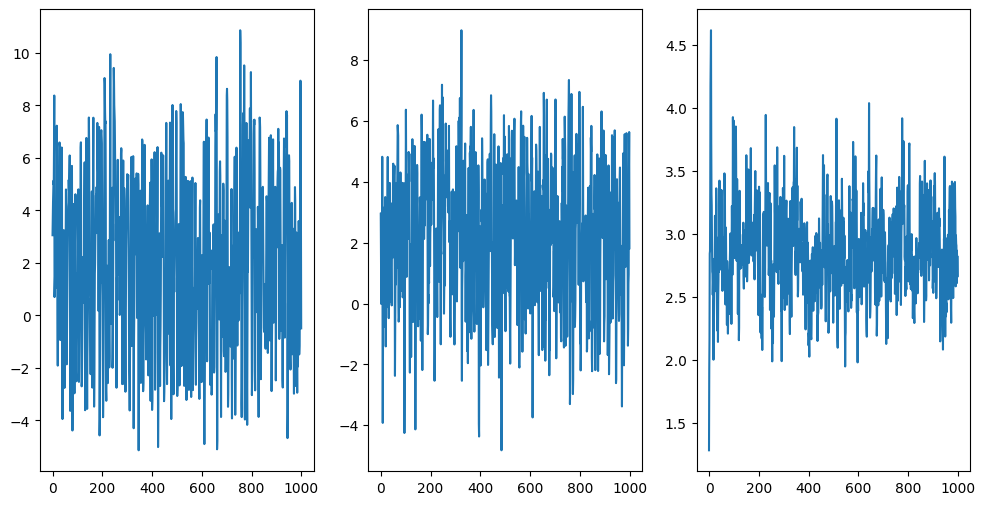

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

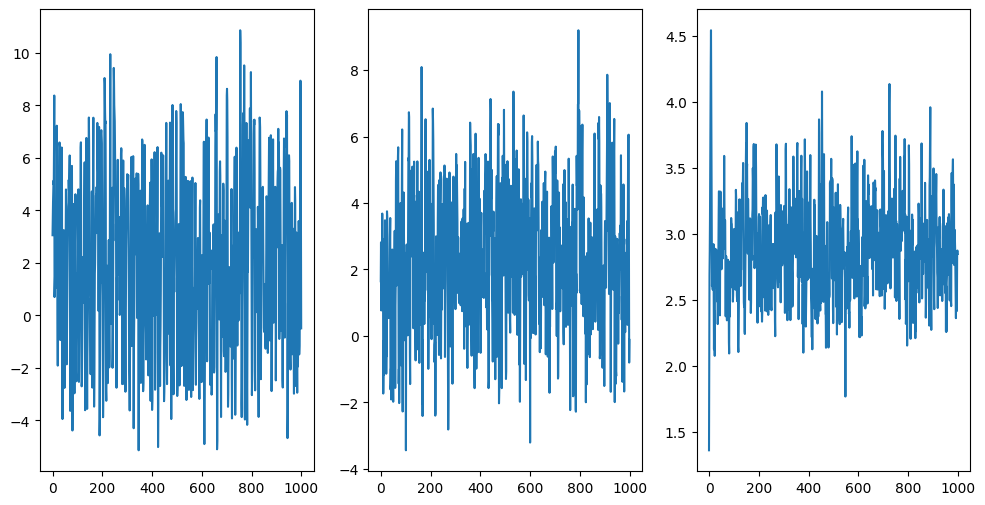

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

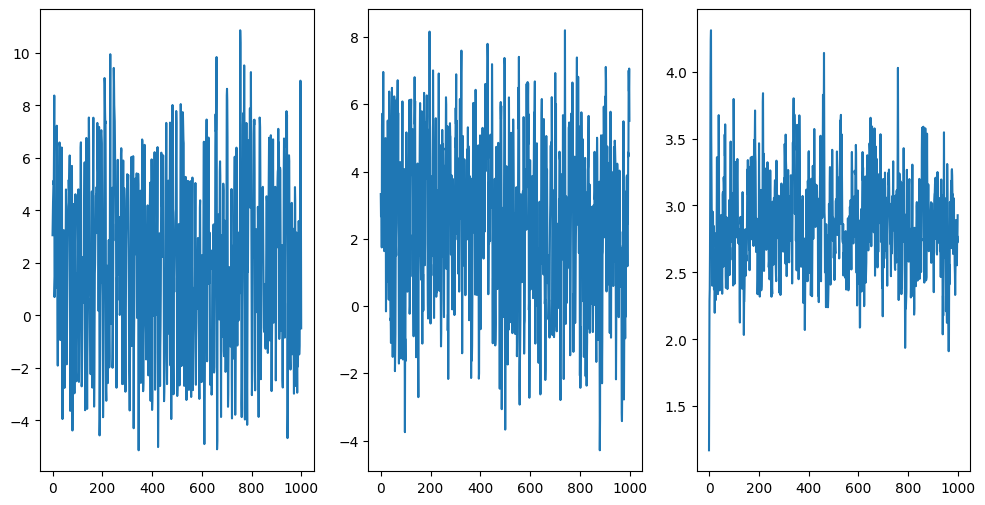

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

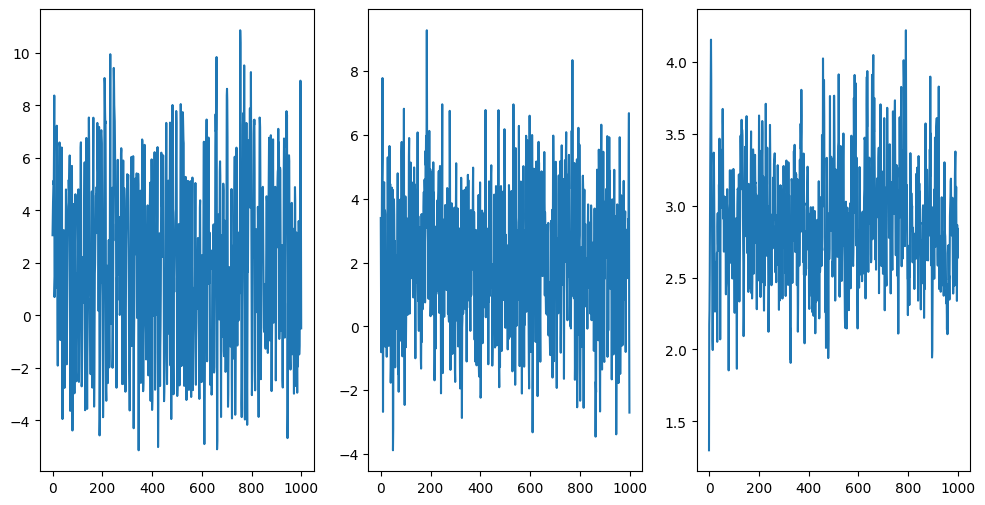

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

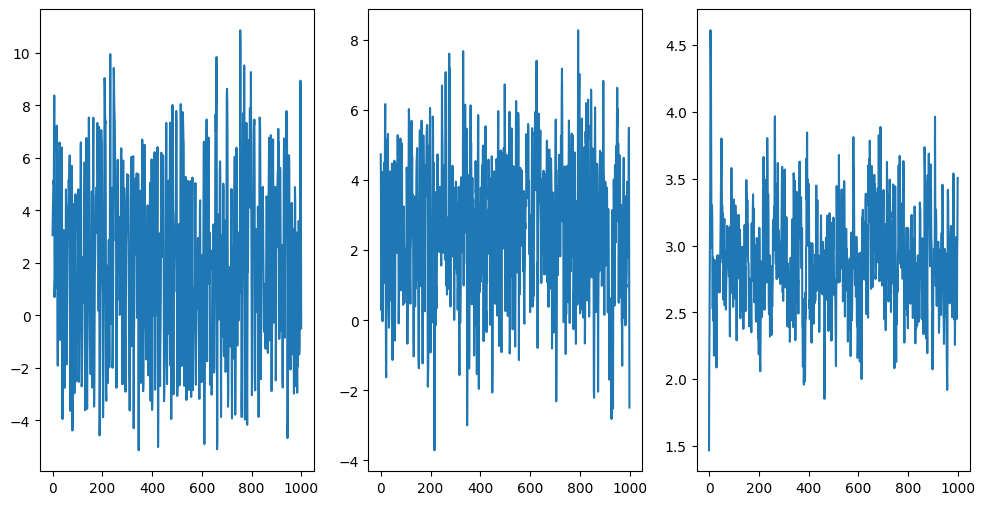

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

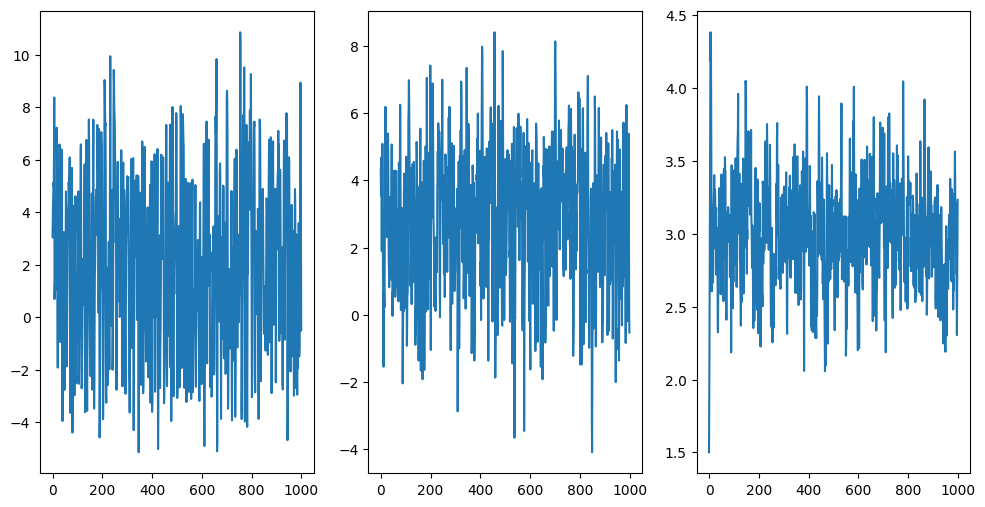

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

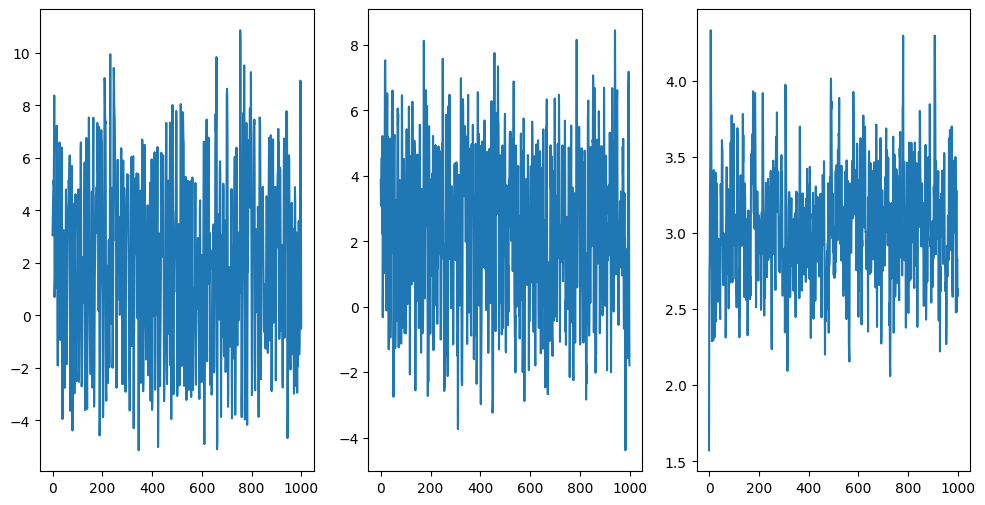

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

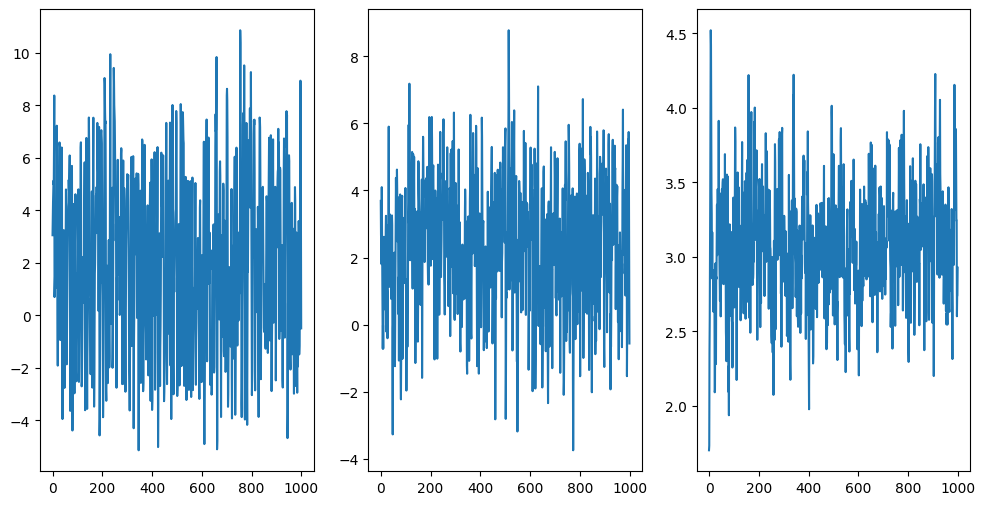

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

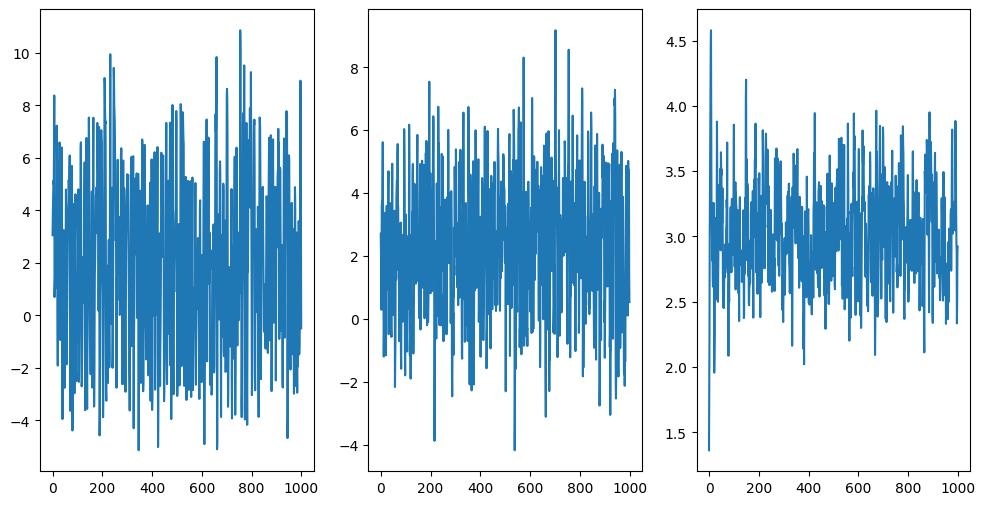

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

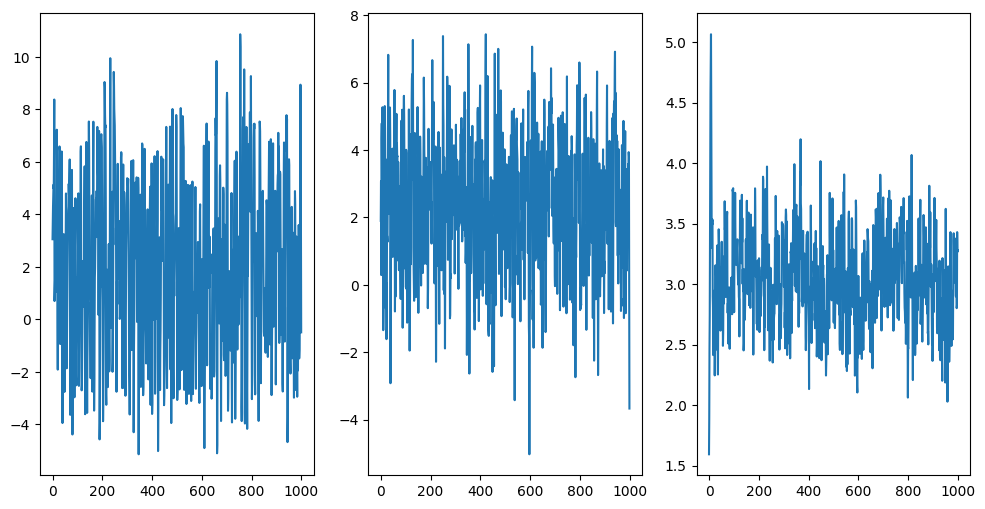

/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(
/home/hammoumr/anaconda3/envs/sb3_v2/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting 

<Figure size 640x480 with 0 Axes>

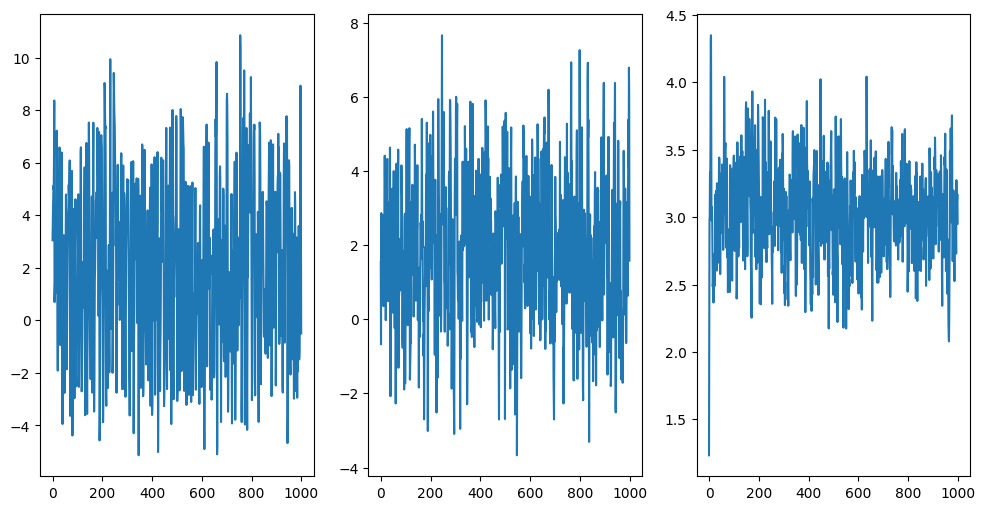

In [4]:
for neuron in neurons:
    for lr in LR:
        for gamma in Gamma:
            for bs in BS:
                for max_grad_norms in max_grad_norm:
                    for vf in vf_coeff:
                        env = SubprocVecEnv([make_env('Lorenz', rank=i, integ_step=int(4), noise=1.0) for i in range(num_cpu)])
                        env = VecNormalize(env, norm_obs=True, norm_reward=False)

                        torch.backends.cudnn.benchmark = True

                        model = PPO.load('trainedModels_L96_assimSteps4_obsNosie1.0_Markov1Step_TrueNorm/'+'neurons'+str(neuron)+'_LR'+str(lr)+'_Gamma'+str(gamma)+'_BS'+str(bs)+'_totSteps3000000_assimStep4_obsNosie1.0_maxgradnorm'+str(max_grad_norms)+'_vfcoeff'+str(vf)+'/'+'PPO_Lorenz96', env=env)
                        obs = env.reset()

                        solution = []
                        ref_soln = []
                        rewards_ = []

                        for _ in range(int(1000)):
                            action, _states = model.predict(obs, deterministic=True)
                            obs, rewards, dones, info = env.step(action)
                            trueObs = env.get_original_obs()
                            trueRew = env.get_original_reward()
                            trueRef = env.env_method("_get_ref", 1)

                            solution.append(trueObs)
                            ref_soln.append(trueRef)
                            rewards_.append(trueRew)

                        sol2 = np.asarray(solution)
                        solR = np.asarray(ref_soln)

                        counter = 0
                        x  = np.zeros((int(1000), 40))
                        xR = np.zeros((int(1000), 40))
                        
                        inst = 1
                        for i in range(int(1000)):
                            x[counter,:] = sol2[i, inst, -40:]
                            xR[counter] = solR[i, inst, -40:]
                            counter += 1

                        RMSE = np.sqrt(np.mean((x-xR)**2, axis=1))
                        # print(RMSE)


                        t1 = np.arange(0, 50, 0.001)

                        plt.clf()
                        plt.figure(figsize=(12, 6))
                        fig1 = plt.gcf()

                        plt.subplot(1, 3, 2)
                        plt.plot(x[:,0])  # Plot some data on the axes.
                        # plt.xlim((0, 1700))
                        plt.subplot(1, 3, 1)
                        plt.plot(xR[:,0])  # Plot some data on the axes.
                        # plt.xlim((0, 1700))
                        plt.subplot(1, 3, 3)
                        plt.plot(RMSE)  # Plot some data on the axes.
                        plt.show()
                        fig1.savefig('figs_True/neurons'+str(neuron)+'_LR'+str(lr)+'_Gamma'+str(gamma)+'_BS'+str(bs)+'_totSteps5000000_assimStep50_obsNosie1.0_maxgradnorm'+str(max_grad_norms)+'_vfcoeff'+str(vf)+'.png')



ValueError: x and y must have same first dimension, but have shapes (50000,) and (1000,)

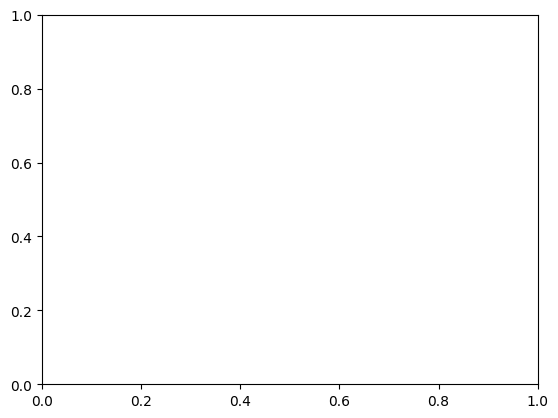

In [5]:
# t1 = np.arange(0, 25, 0.001)

# plt.figure(figsize=(12, 6))
plt.plot(t1, RMSE, label='x')

In [ ]:
# trainedModels_withNoise_POMDP_X_noActionLimit_v2